In [1]:
%load_ext autoreload
%autoreload 2
from Network import Network
from FrankWolf import *
from EntropyMaximisation import *

import matplotlib.pyplot as plt

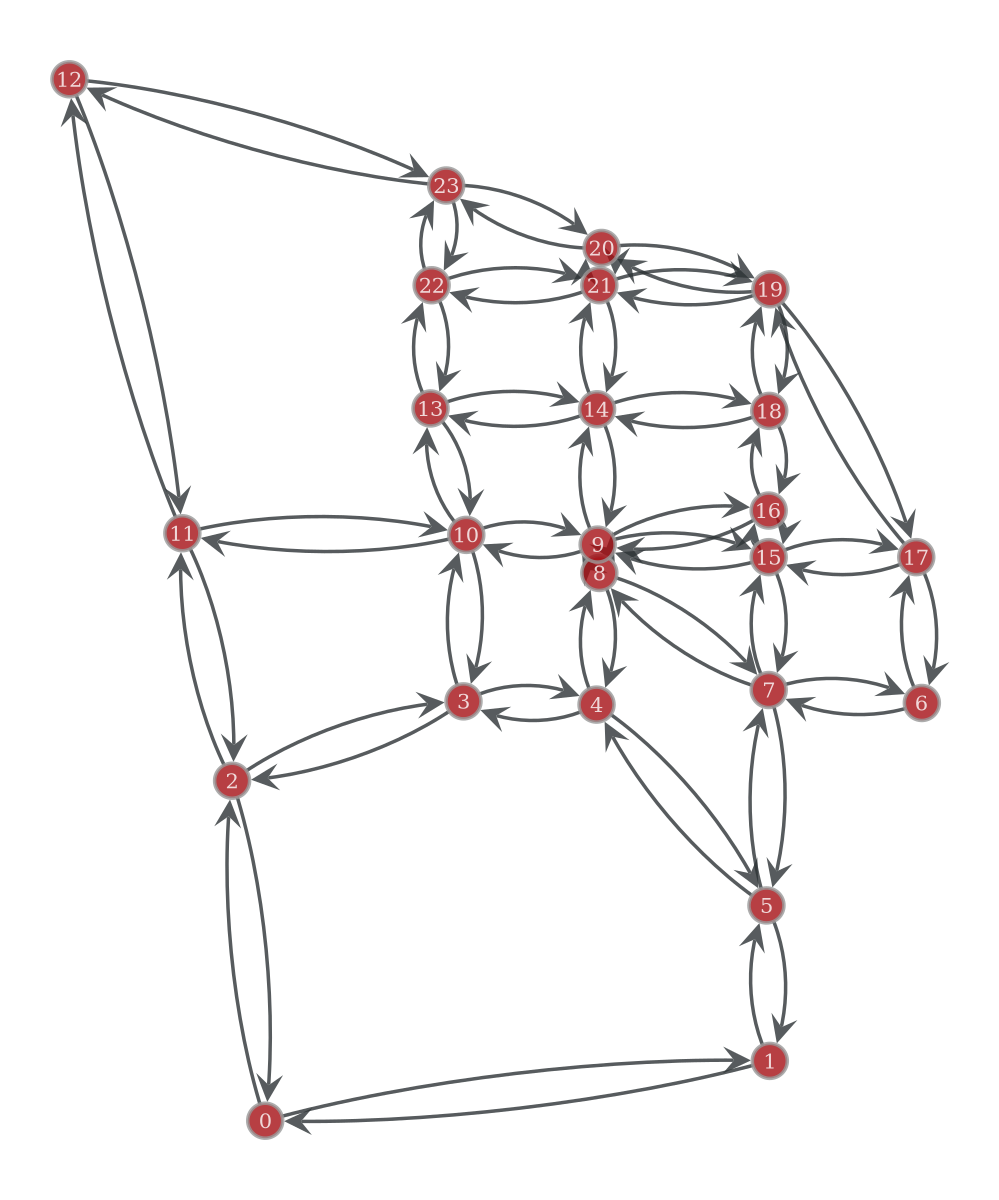

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc06d201bb0, at 0x7fc0721bae10>

In [2]:
net = Network("SiouxFalls")
net.draw()

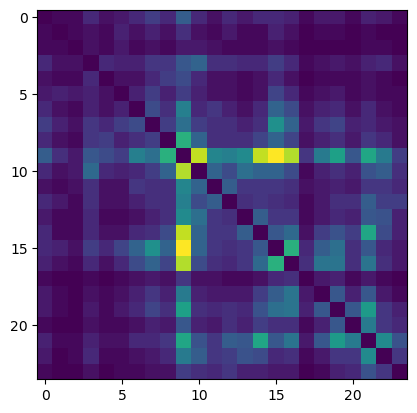

In [3]:
plt.imshow(net.trips)

In [4]:
ue_by_origin, ue_flows = frankwolf(net, net.trips, verbose=1)

0it [00:00, ?it/s]

In [21]:
x_n.get_array()

PropertyArray([ 3.19309286e-02,  2.51329870e-02,  3.19309286e-02,
                1.02817920e-11,  2.51329870e-02,  1.07756041e-07,
                9.91883592e-09,  1.07753879e-07,  1.27173759e-12,
                1.11683629e-13,  1.88507569e-12,  1.63168156e-17,
                3.49249416e-22,  1.04933130e-11,  9.59262388e-16,
                0.00000000e+00,  6.57693102e-15,  1.05950817e-22,
               -2.23567467e-13, -4.16338973e-22, -4.86211712e-18,
                0.00000000e+00, -1.25728602e-12,  4.93119819e-21,
                1.72295032e-23, -1.11857440e-13, -9.89614065e-16,
               -1.73085811e-21,  0.00000000e+00, -3.37870413e-23,
                1.06267004e-13,  0.00000000e+00, -1.55925808e-16,
               -2.14211421e-25,  9.91874883e-09,  1.33774864e-21,
                1.36020859e-17,  1.35072382e-14,  0.00000000e+00,
                7.42980365e-15,  0.00000000e+00, -9.61189148e-21,
               -2.13814280e-14,  1.94727678e-17, -4.15371320e-23,
          

/mnt/c/Users/arsju/OneDrive/Documents/1 Etudes/EPFL MA3 2024-2025/PROJETS/BRAESS LINKS/Implementation/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


(76,)
[3.19309286e-02 2.51329870e-02 4.52019605e+03 1.45550780e-06
 8.09661674e+03 3.47137158e-02 3.19536285e-03 5.16268059e+03
 6.09308445e-02 5.35087069e-03 3.36071026e+03 2.32201205e-02
 1.21181828e-06 3.25522046e+03 2.93016214e-01 0.00000000e+00
 1.11375611e+03 1.69907011e-06 2.72636314e+03 3.63598239e-06
 5.70094637e-02 0.00000000e+00 3.14402453e+03 6.17394944e-05
 3.29581212e-07 2.61125756e+03 2.15611834e+00 5.52521563e-06
 0.00000000e+00 3.65743247e-07 1.10198329e+03 0.00000000e+00
 7.21512925e-01 6.84490580e-10 2.56517999e+03 3.45969076e-10
 3.51800137e-06 1.89113360e+03 0.00000000e+00 4.00524731e+02
 0.00000000e+00 1.11865086e-04 8.15841390e+02 4.85527682e-01
 3.93748788e-06 7.18486074e-06 5.61249955e+02 4.58274496e-02
 7.98554294e-07 3.39345041e+01 3.99359454e+02 6.54538636e-01
 3.60058932e-02 4.69639496e+02 1.61031507e-01 1.29015284e-06
 2.99925146e+02 1.67330541e-02 1.06774390e-01 3.00119109e+02
 3.78128169e-06 3.30536090e-02 2.31883217e-06 1.25332326e-03
 3.09835051e-06 3.

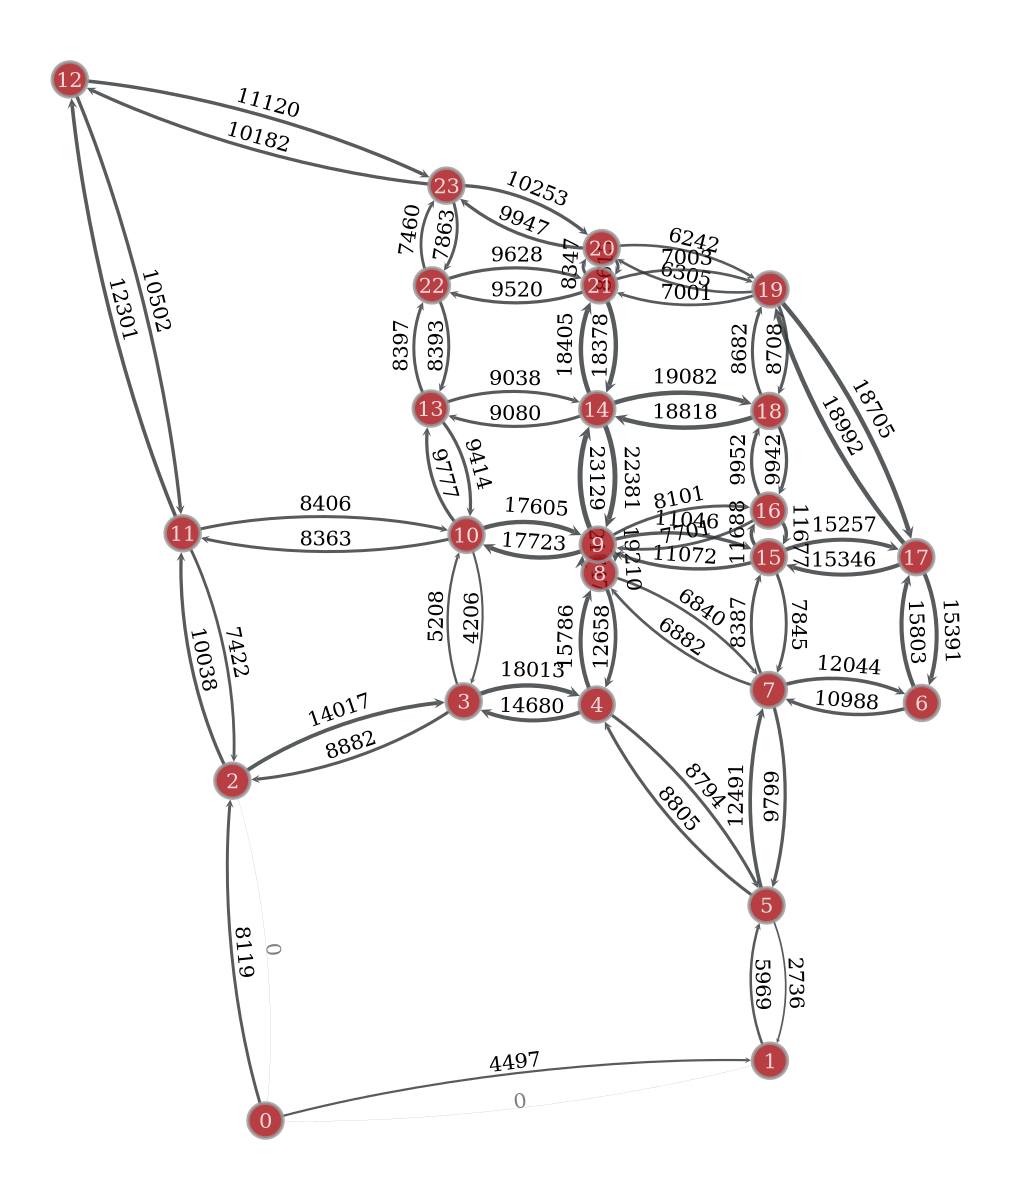

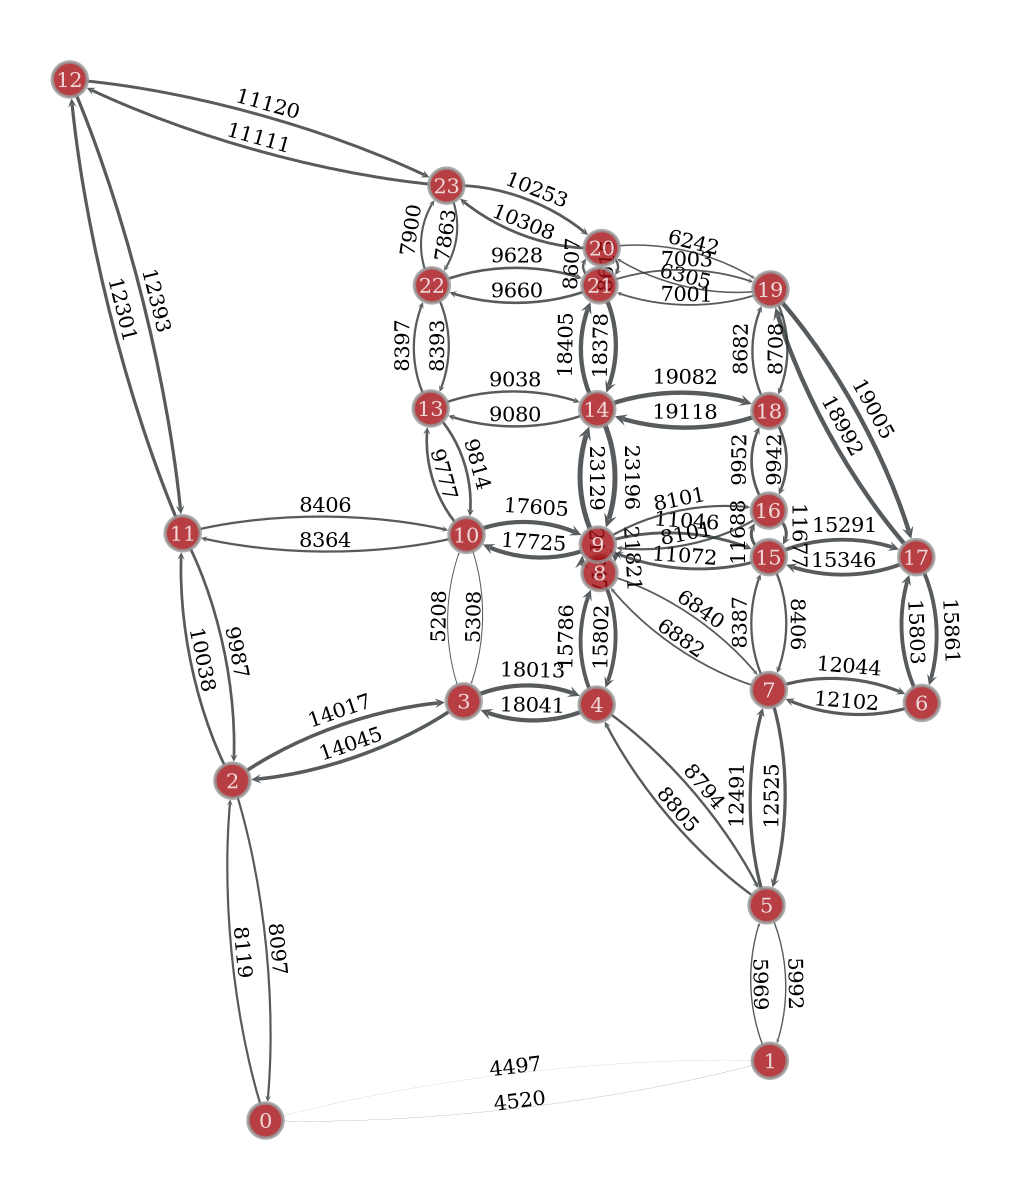

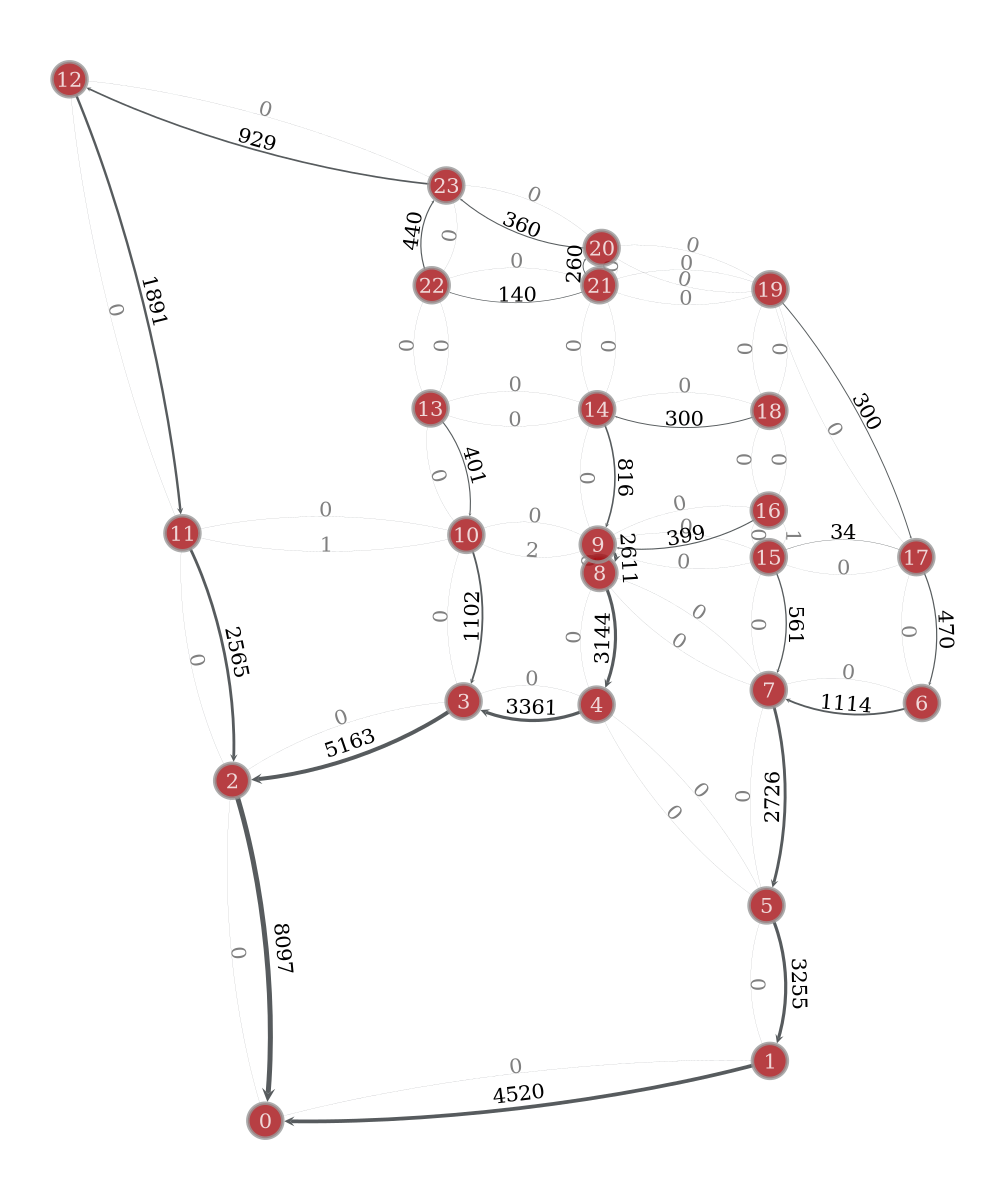

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc06d201bb0, at 0x7fc06a5885c0>

In [23]:
n = 0
x_n, residuals = backward_entropy_maximisation(net, ue_by_origin, n)
flows = forward_entropy_maximization(net, x_n, residuals, n)

net.draw(flows_by_o = residuals, o="sum")
net.draw(flows = ue_flows)
net.draw(flows=x_n)

In [24]:
flows.get_2d_array().sum(axis=0) - ue_flows.a

PropertyArray([-3.19309286e-02, -2.51329870e-02, -3.19309286e-02,
               -1.18234311e-11, -2.51329870e-02, -1.07755113e-07,
               -9.92258720e-09, -1.07751475e-07, -3.63797881e-12,
                0.00000000e+00, -3.63797881e-12,  0.00000000e+00,
               -1.81898940e-12, -1.09139364e-11,  1.81898940e-12,
                0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                1.81898940e-12,  0.00000000e+00,  9.09494702e-13,
                0.00000000e+00,  1.81898940e-12,  9.09494702e-13,
                3.63797881e-12,  3.63797881e-12,  0.00000000e+00,
                3.63797881e-12,  0.00000000e+00,  0.00000000e+00,
               -1.81898940e-12,  0.00000000e+00, -1.81898940e-12,
                0.00000000e+00, -9.91531124e-09,  0.00000000e+00,
                1.81898940e-12, -1.81898940e-12,  0.00000000e+00,
               -1.81898940e-12,  0.00000000e+00,  0.00000000e+00,
               -3.63797881e-12, -1.81898940e-12, -3.63797881e-12,
          

In [59]:
flows_by_o = EMARB(net, ue_by_origin, 1e-4)

0it [00:00, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

/mnt/c/Users/arsju/OneDrive/Documents/1 Etudes/EPFL MA3 2024-2025/PROJETS/BRAESS LINKS/Implementation/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


  0%|          | 0/24 [00:00<?, ?it/s]

KeyboardInterrupt: 

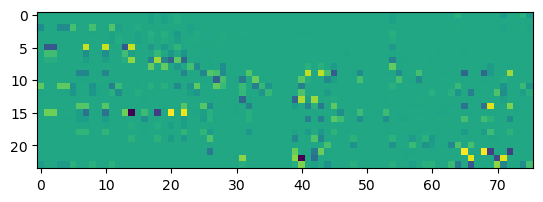

In [53]:
plt.imshow(Out[48].get_2d_array()-ue_by_origin.get_2d_array())

In [55]:
(Out[48].get_2d_array()-ue_by_origin.get_2d_array()).max()

64.24483397912445